# k-Means
## This notebook outlines the main concepts behind k-means 

This k-Means comes into a category of **clustering algorithms**.

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## k-Means Theory

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.

Three important concepts
- Cluster
- Cluster center
- Distance

Two major assumptions:
- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

To illustrate the theory, we will first construct a cluster of 4 groups of data points using make_blobs

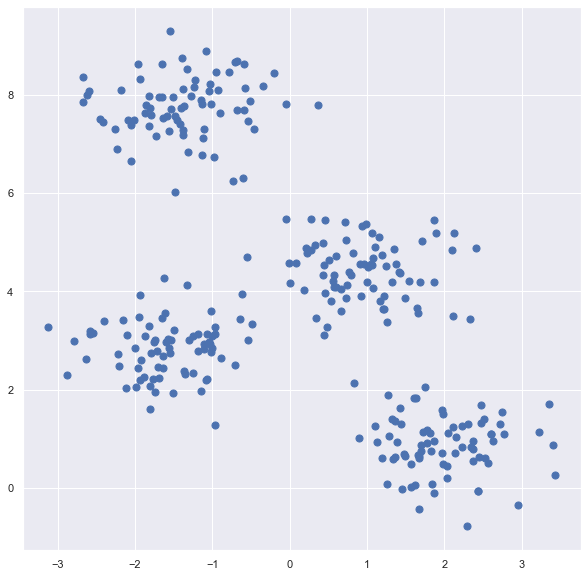

In [28]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, 
                       centers=4,
                       cluster_std=0.60, 
                       random_state=0
)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50);

### Can you pick the four clusters together?
Its pretty easy right. Yeah it is. But how to make the Machine group it automatically. Lets build one using Scikit-learn.

Four steps
- Import the KMeans Estimator
- Create the KMeans estimator object
- Fit the model
- Predict

### Import the KMeans Estimator

In [6]:
from sklearn.cluster import KMeans

### Create the KMeans model specifying the number of clusters to make

In [7]:
kmeans = KMeans(n_clusters=4)

### Fit the model

In [8]:
kmeans.fit(X)

KMeans(n_clusters=4)

### Predict

In [9]:
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels.
Also plot the cluster centers as determined by the *k*-means estimator

### Use scatter plot
- Supply X and Y to plot with c=y_kmeans for different colors
- Find the cluster centres from **cluster_centers_** attribute
- Plot the cluster centres in black dot

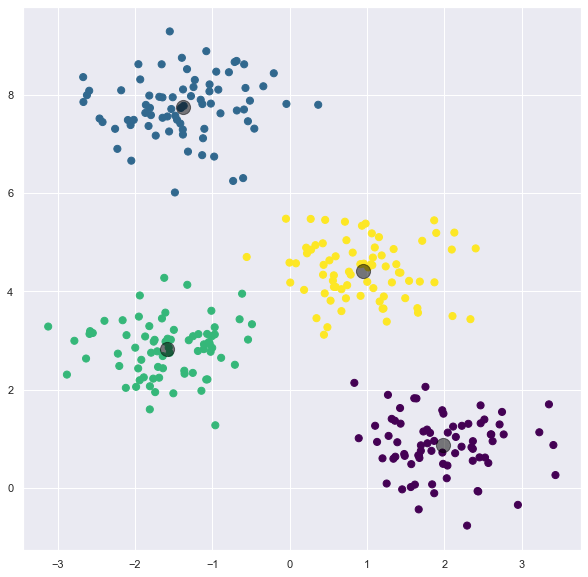

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.

But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.

An exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive **iterative** approach known as **expectation–maximization**.

## k-Means Algorithm: Expectation–Maximization (E-M)

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

Summary
- E-Step: Assign each point to the nearest cluster center 
- M-Step: Recompute the cluster centres to the mean of the data points

[E-M Steps](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/Steps_in_E-M.png)

The *k*-Means algorithm is simple enough that we can write it in a few lines of code.
The following is a very basic implementation:

### Optional: You will not write in your daily work... But good to know how it is done

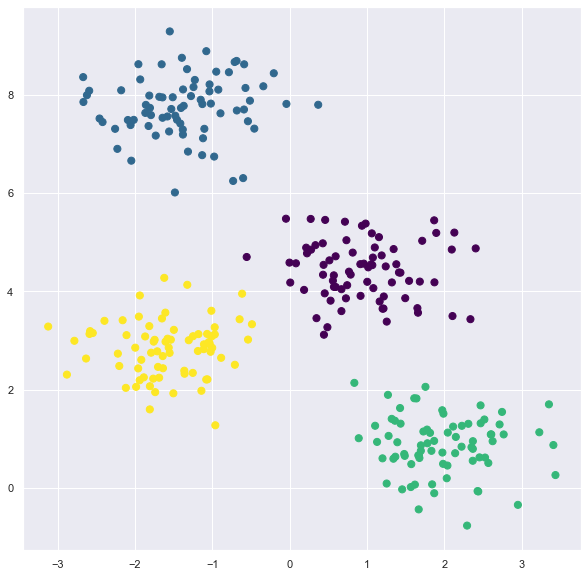

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, RSEED=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(RSEED)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Issues of expectation–maximization

There are a few issues to be aware of when using the expectation–maximization algorithm.
- Random seed could lead to bad clustering (Not always guaranteed to have the best clustering possible)
- Number of clusters to be determined aprior
- Can group only linear decision boundaries
- Super slow for large datasets

### Issue #1: Random seeds lead to different results
First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
For example, if we use a different **random seed** in our simple procedure, the particular starting guesses lead to poor results

### Try the RSEED with different number

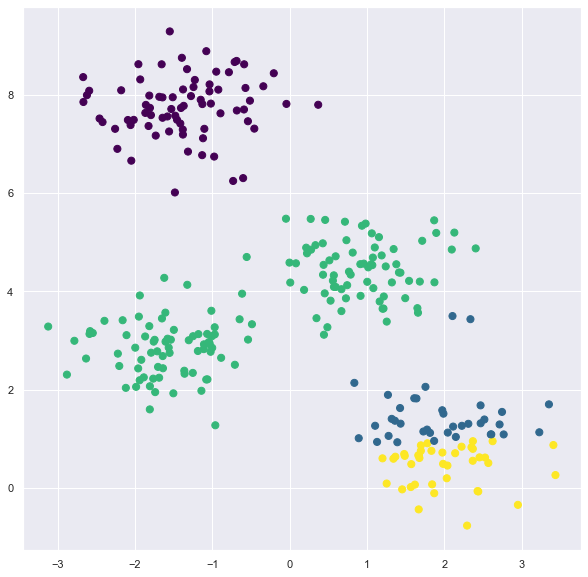

In [14]:
centers, labels = find_clusters(X, 4, RSEED=0)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Try another RSEED number

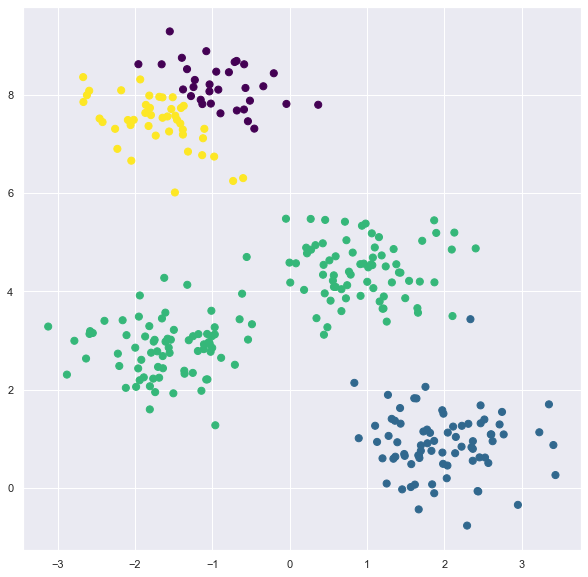

In [18]:
centers, labels = find_clusters(X, 4, RSEED=3)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Try another one for fun!

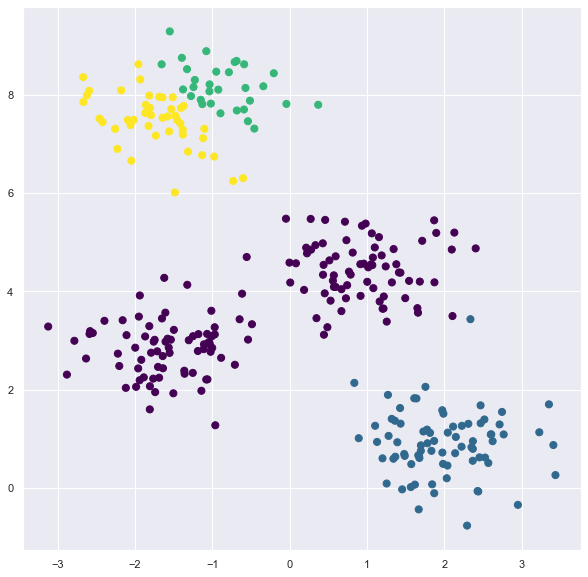

In [22]:
centers, labels = find_clusters(X, 4, RSEED=7)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### What is happening here?
- Is the algorithm converging?
- Is the algorithm converging into a global minima?

Solution: **Run for multiple starting guesses**

### Issue #2:  The number of clusters must be selected beforehand
It cannot learn the number of clusters from the data.

### Ask to find 6 clusters instead of the actual 4 clusters.

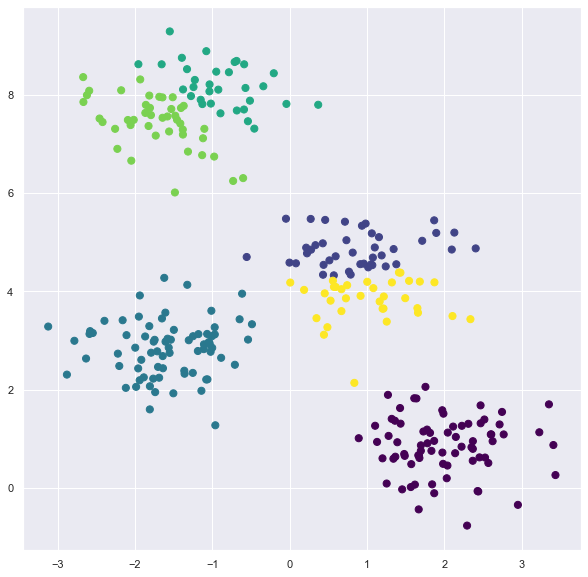

In [23]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Ask for the algorithm to find 10 clusters for you...

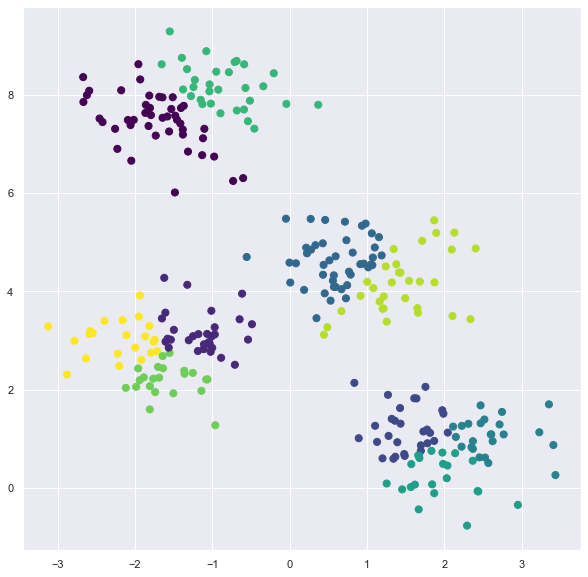

In [26]:
labels = KMeans(10, random_state=0).fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Solution: **Silhouette Analysis**

### Silhouette Analysis
Selecting the number of clusters with silhouette analysis on KMeans clustering

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Silhouette analysis can be used to study the **separation distance** between the resulting clusters. The silhouette plot displays a measure of how **close** each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. 

Silhouette Coefficients

- +1 : sample is far away from the neighboring clusters
- 0 : sample is on or very close to the decision boundary between two neighboring clusters 
- -ve : samples might have been assigned to the wrong cluster

### Try passing a list of possible clusters to play with [2,3,4,5,6,7,8,9,10]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923027677672242
For n_clusters = 6 The average silhouette_score is : 0.49934504405927566
For n_clusters = 7 The average silhouette_score is : 0.4087762913932282
For n_clusters = 8 The average silhouette_score is : 0.32451129928470707
For n_clusters = 9 The average silhouette_score is : 0.3296577036176752
For n_clusters = 10 The average silhouette_score is : 0.338430669534866


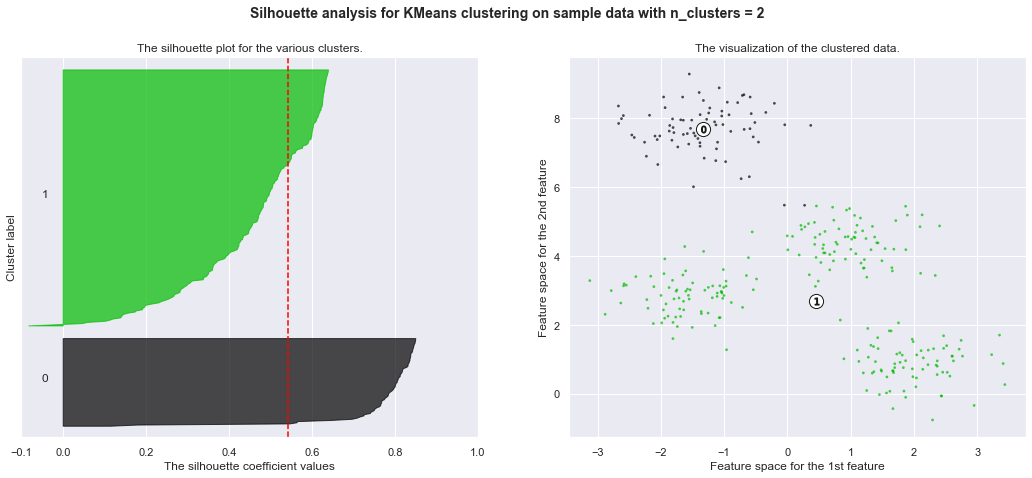

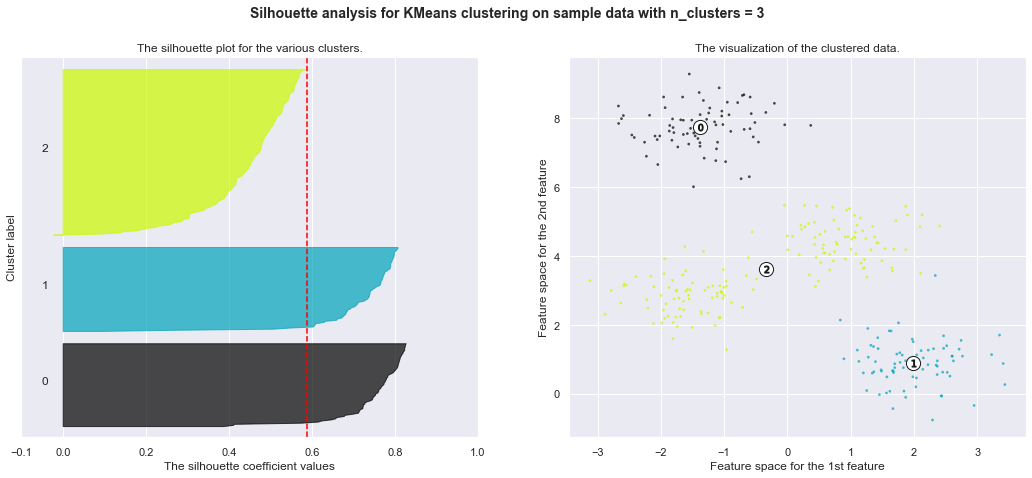

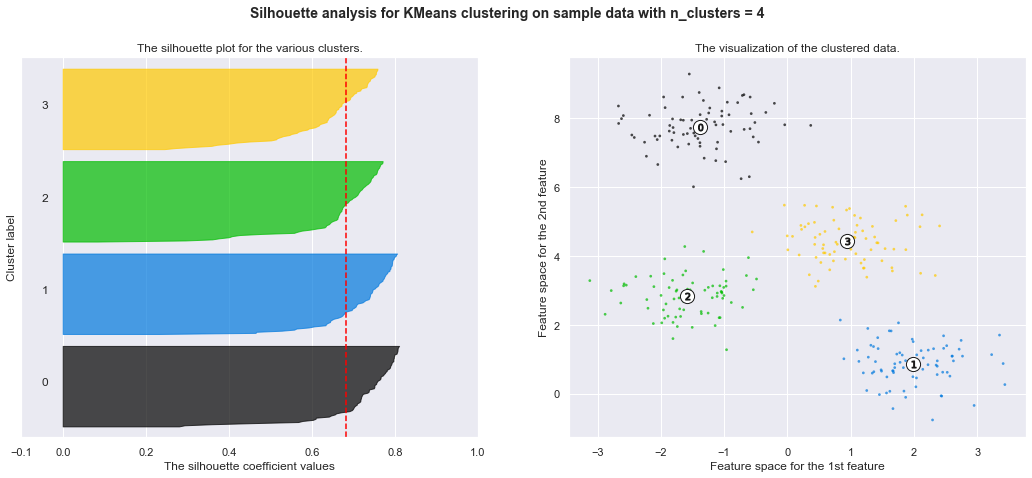

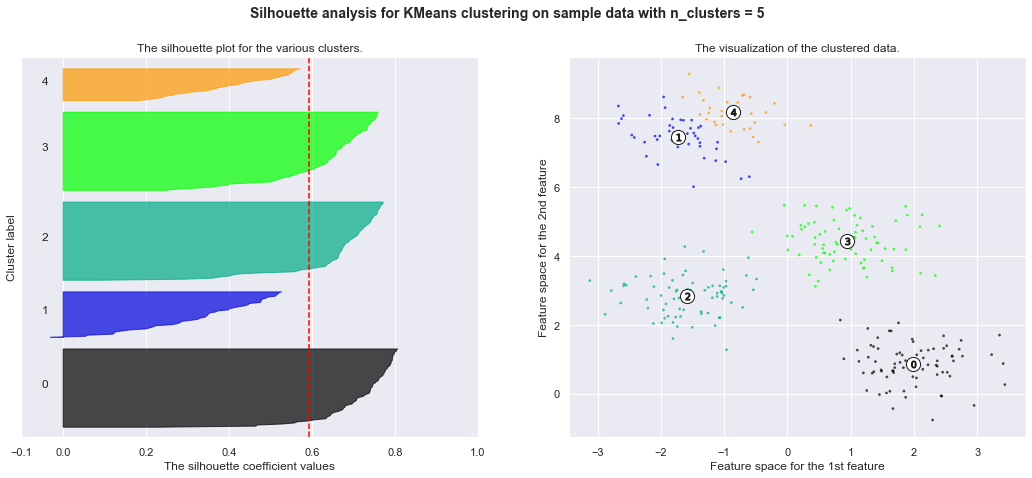

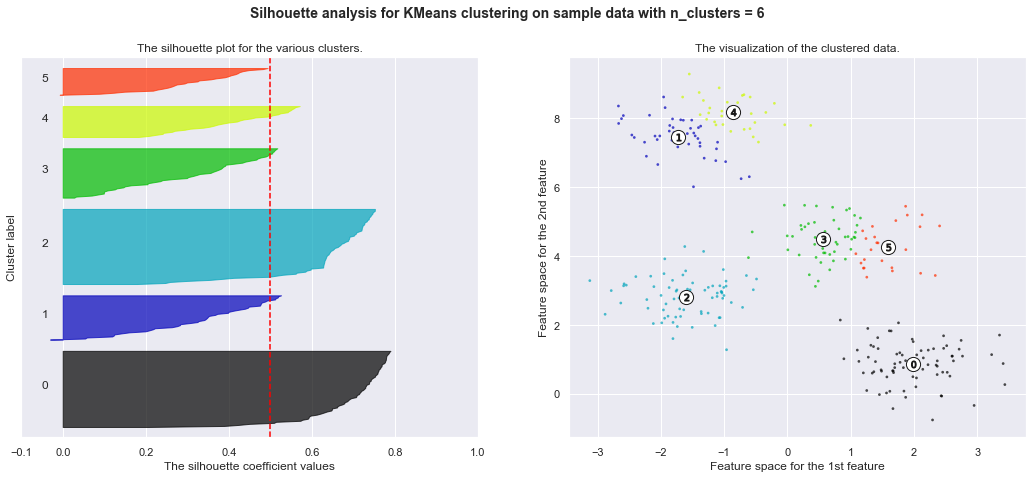

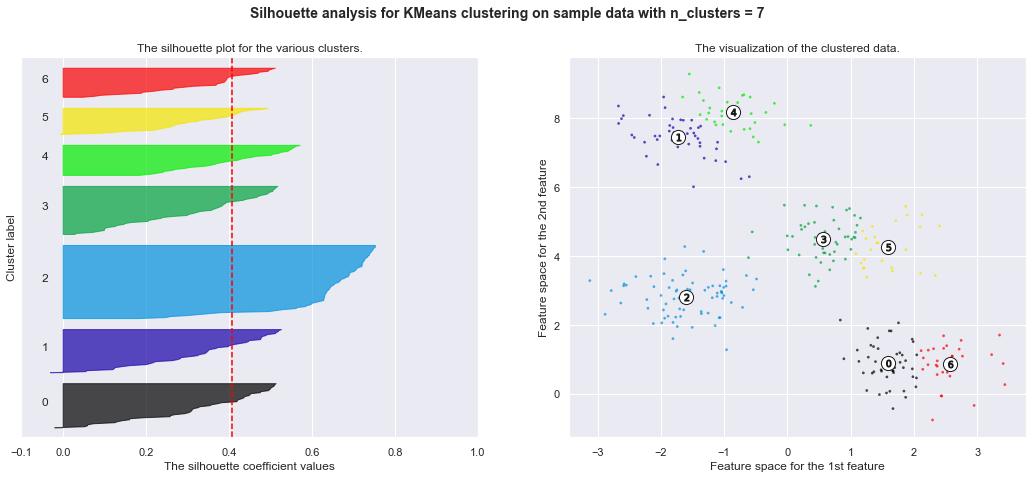

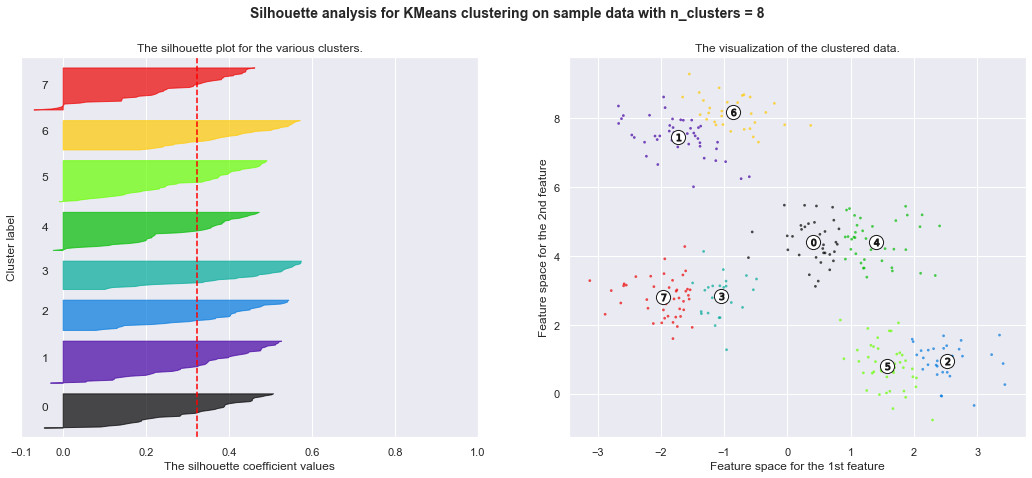

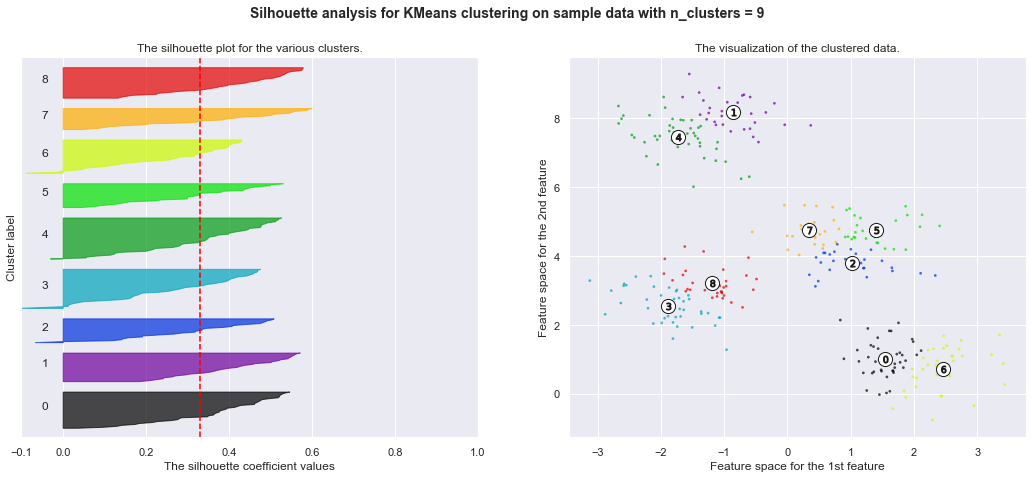

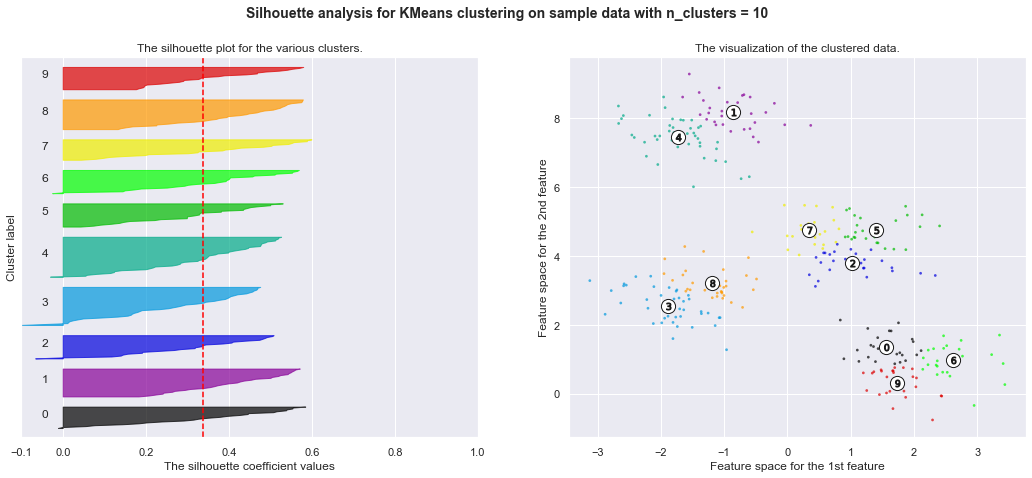

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# range_n_clusters = list(set(np.linspace(2, 50).astype(int)))


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Issue #3: k-means is limited to linear cluster boundaries
The fundamental model assumptions of *k*-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between *k*-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical *k*-means approach:

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

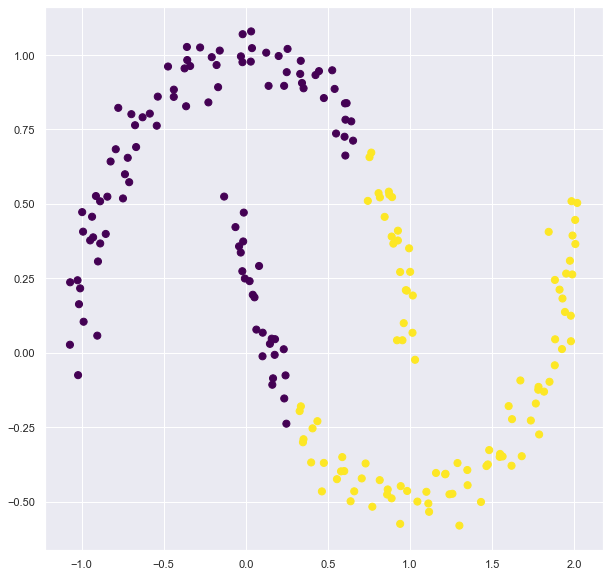

In [37]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Solution: **Kernel Trick**

``SpectralClustering`` estimator

It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm

## SpectralClustering
### Import SpectralClustering

In [39]:
from sklearn.cluster import SpectralClustering

### Create the model with number of clusters, affinity of nearest neighbors and assign the labels to kmeans

In [40]:
model = SpectralClustering(n_clusters=2, 
                           affinity='nearest_neighbors',
                           assign_labels='kmeans'
)

### Fit the model

In [41]:
model.fit(X)

/Users/subashgandyer/opt/anaconda3/envs/testing/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

### Predict on data points

In [42]:
labels = model.predict(X)

AttributeError: 'SpectralClustering' object has no attribute 'predict'

In [43]:
labels = model.fit_predict(X)

/Users/subashgandyer/opt/anaconda3/envs/testing/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


### Plot the clusters

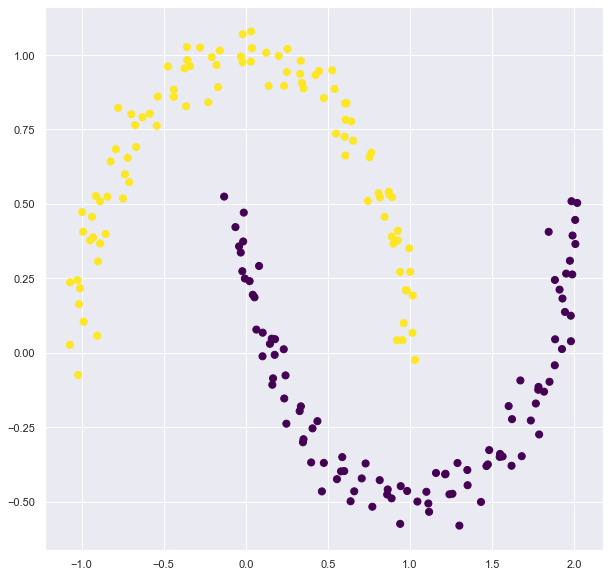

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

### Issue #4: k-means can be slow for large numbers of samples

Solution: **MiniBatchKMeans**

Do not use all data at each iteration ; instead use a subset of the data to update the cluster centers at each step

### Homework: Build a KMeans Clustering model using MiniBatchKMeans for the same dataset